In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
data=  pd.read_csv('/content/drive/MyDrive/work/rescue.csv', encoding='euc-kr')
print(data.head())
print(data.describe())
print(data.shape)
print(data.info())
print(data.dtypes)
print(data.index)

df = data.copy()
print('+++++현장도착시간과 신고시간 사이의 차이(분): timediff+++++')
df['timediff'] = (df['spt_arvl_min']+60*df['spt_arvl_hour']) - (df['dclr_min']+60*df['dclr_hour'])
print(df.head())

print('##### 현장도착시간과 신고시간 사이의 차이 내림차순 정렬 #####')
df = df.sort_values(by='timediff', ascending=False)
print(df.head())

print('현장도착시간과 신고시간 사이의 차이가 가장 큰 보고서 번호(no): ', end=''); print(df.iloc[0]['no'])
print('현장도착시간과 신고시간 사이의 차이가 가장 큰 값(분): ', end=''); print(df.iloc[0]['timediff'])
print('현장도착시간과 신고시간 차이의 평균(분): ', end=''); print(round(df['timediff'].mean(), 5))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
                  no cause result season daywk  dclr_hour  dclr_min  dsp_hour  \
0  20114501201S00001  위치확인     기타     겨울   토요일          0        28         0   
1  20114501201S00002  위치확인     기타     겨울   토요일          2        40         2   
2  20114501201S00003    화재     기타     겨울   토요일          3        26         3   
3  20114501201S00004    교통     기타     겨울   토요일          5        15         5   
4  20114506103S00001    산악   인명구조     겨울   토요일          8        31         8   

   dsp_min  spt_arvl_hour  spt_arvl_min  
0       29              0            34  
1       47              2            50  
2       26              3            28  
3       15              5            18  
4       31              8            51  
       dclr_hour   dclr_min   dsp_hour    dsp_min  spt_arvl_hour  spt_arvl_min
count  18.000000  18.000000  18.000000  18.000000    

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
data=  pd.read_csv('/content/drive/MyDrive/work/teacher.csv', encoding='euc-kr')
print(data.head())
print(data.describe())
print(data.shape)
print(data.info())
print(data.dtypes)
print(data.index)
df = data.copy()

df['st_teacher'] = df['student'] / df['teacher']
print('^^^^^선생님 1인당 학생수 열("st_teacher") 추가^^^^^')
print(df.head())
print('@@@@@ 선생님 1인당 학생수 내림차순 정렬@@@@@')
df = df.sort_values(['st_teacher'], ascending=False)
print(df.head())

indexgap = df.index[0]
print('선생님 1인당 학생수가 가장 많은 자치구: ', end=''); print(df.loc[indexgap, 'district'])
print('선생님 1인당 학생수가 가장 많은 자치구에서의 선생님의 수(명): ', end=''); print(df.loc[indexgap, 'teacher'])
print('선생님 1인당 학생수가 가장 많은 자치구에서의 1인당 학생의 수(명): ', end=''); print(df.loc[indexgap, 'st_teacher'])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
  district  student  teacher
0      종로구     4961      443
1       중구     4766      381
2      용산구     6396      574
3      성동구    10408      873
4      광진구    13476      954
            student     teacher
count     25.000000    25.00000
mean   15742.600000  1133.40000
std     6946.080831   441.98058
min     4766.000000   381.00000
25%    12839.000000   912.00000
50%    13750.000000  1054.00000
75%    21867.000000  1379.00000
max    31536.000000  2210.00000
(25, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   district  25 non-null     object
 1   student   25 non-null     int64 
 2   teacher   25 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 728.0+ bytes
None
district    object
student      int64
teacher    

- df['ym_datetime'] = pd.to_datetime(df['ym']): object(문자열)형을 datetime형으로 변환
- df['year'] = df['ym_datetime'].dt.strftime('%Y'): 연도 추출
- df['month'] = df['ym_datetime'].dt.strftime('%m'): 월 추출
- result = df['year', 'month', 'cases']: (연도, 월, 범죄건수) 데이터프레임
- result.group = result.groupby(by=['year'], dropna=False).sum(): 연도별 범죄 발생 건수의 합
- result_group['average'] = result.group['cases']/12: 연도별 월평균 범죄건수
- dfnew = result_group.sort_values(['average'], ascending=False): 연도별 범죄건수 내림차순 정렬
- dfnew.iloc[0,1]: 연도별 범죄 발생 건수가 가장 많은 연도의 월평균 범죄건수(건)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import datetime as dt
data=  pd.read_csv('/content/drive/MyDrive/work/crime.csv', encoding='euc-kr')
print(data.head())
print(data.describe())
print(data.shape)
print(data.info())
print(data.dtypes)
print(data.index)
print('%%%%% 연도, 월 추출 및 열 추가, year:연도, month:월 %%%%%')
df = data.copy()
df['ym_datetime'] = pd.to_datetime(df['ym'])
df['year'] = df['ym_datetime'].dt.strftime('%Y')
df['month'] = df['ym_datetime'].dt.strftime('%m')
print(df.head())
print(df.dtypes)
result = df[['year', 'month', 'cases']]
print(result.head())
print('!!!!! 연도별 범죄 발생 건수의 합(groupby()) !!!!!')
result_group = result.groupby(by=['year'], dropna=False).sum()
print(result_group.head())
result_group['average'] = result_group['cases']/12
dfnew = result_group.sort_values(['average'], ascending=False)
print('$$$$$ 연도별 범죄 발생 건수(월평균)의 평균 내림차순 정렬')
print(dfnew.head())
print('연도별 범죄 발생 건수(월평균)가 가장 큰 연도의 월평균 범죄 발생 건수(건): ', end=''); print(round(dfnew.iloc[0,1],2))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
         ym    crime  cases
0  2008. 01       살인     19
1  2008. 01       강도     49
2  2008. 01  강간·강제추행    191
3  2008. 01       절도   1870
4  2008. 01       폭력   5534
             cases
count   360.000000
mean   2087.777778
std    2525.282955
min       7.000000
25%      44.750000
50%     374.500000
75%    4732.000000
max    7459.000000
(360, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ym      360 non-null    object
 1   crime   360 non-null    object
 2   cases   360 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 8.6+ KB
None
ym       object
crime    object
cases     int64
dtype: object
RangeIndex(start=0, stop=360, step=1)
%%%%% 연도, 월 추출 및 열 추가, year:연도, month:월 %%%%%
         ym    crime  cases ym_datetim

<ipython-input-3-e56d4f3a8661>:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['ym_datetime'] = pd.to_datetime(df['ym'])


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import datetime as dt
data=  pd.read_csv('/content/drive/MyDrive/work/crime.csv', encoding='euc-kr')
print(data.head())
print(data.describe())
print(data.shape)
print(data.info())
print(data.dtypes)
print(data.index)
print('%%%%% 연도, 월 추출 및 열 추가, year:연도, month:월 %%%%%')
df = data.copy()
df['ym_datetime'] = pd.to_datetime(df['ym'])
df['year'] = df['ym_datetime'].dt.strftime('%Y')
df['month'] = df['ym_datetime'].dt.strftime('%m')
print(df.head())
print(df.dtypes)
result = df[['year', 'month','crime', 'cases']]
print(result.head())
print('!!!!! 연도별 범죄 발생 건수의 합(groupby()) !!!!!')
result_group = result.groupby(by=['year', 'crime'], dropna=False).sum()
print(result_group.head())
result_group['average'] = result_group['cases']/12
dfnew = result_group.sort_values(['average', 'crime'], ascending=False)
print('$$$$$ 연도별 범죄 발생 건수(월평균)의 평균 내림차순 정렬')
print(dfnew.head())
print('연도별 범죄 발생 건수(월평균)가 가장 큰 연도의 월평균 범죄 발생 건수(건): ', end=''); print(round(dfnew.iloc[0,1],2))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
         ym    crime  cases
0  2008. 01       살인     19
1  2008. 01       강도     49
2  2008. 01  강간·강제추행    191
3  2008. 01       절도   1870
4  2008. 01       폭력   5534
             cases
count   360.000000
mean   2087.777778
std    2525.282955
min       7.000000
25%      44.750000
50%     374.500000
75%    4732.000000
max    7459.000000
(360, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ym      360 non-null    object
 1   crime   360 non-null    object
 2   cases   360 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 8.6+ KB
None
ym       object
crime    object
cases     int64
dtype: object
RangeIndex(start=0, stop=360, step=1)
%%%%% 연도, 월 추출 및 열 추가, year:연도, month:월 %%%%%
         ym    crime  cases ym_datetim

<ipython-input-4-616a6a17a92a>:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['ym_datetime'] = pd.to_datetime(df['ym'])


- x(독립변수): 진단 결과 개수(S1, S2, S3, S3, S4, S5)
- y(종속변수): 연령대(age), 0~8까지의 값으로 범주화 변환(map)
- trainx, testx, trainy, testy = train_test_split(x, y, test_size=0.3, random_state=42): 훈련데이터세트=70%, 검증데이터세트=30% 랜덤 추출
- model = RandomForestClassifier(n_estimators=100, random_state=42): 트리의 개수=100 개인 랜덤 포레스트 모형 구축
- model.fit(trainx, trainy): 모형 훈련(학습)
- predictions = model.predict(testx): 검증데이터에 대한 예측 결과 저장

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
data = pd.read_csv('/content/drive/MyDrive/work/asbestos.csv', encoding='euc-kr', header=0, index_col=0)
print(data.head()); df = data.dropna()
x = df[['S1' ,'S2', 'S3', 'S4', 'S5']]
y = df['age'].map({'10대':0, '20대':1, '30대':2, '40대':3, '50대':4, '60대':5, '70대':6, '80대':7, '90대':8})
trainx, testx, trainy, testy = train_test_split(x, y, test_size=0.3, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(trainx, trainy)
predictions = model.predict(testx)
print(predictions[:10])
print('Radom Forest (랜덤포레스트) 분류 모형 성능(정확도): ', end=''); print(accuracy_score(testy, predictions))
print('$$$ Confusion Matrix, 혼동행렬 $$$')
conf = confusion_matrix(testy, predictions); print(conf)
print('*** 분류 분석 모형 성능평가 지표 ***')
print(classification_report(testy, predictions))
print('!!! 특성 중요도 !!!')
print(model.feature_importances_)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
        S1  S2  S3  S4  S5  S6  S7  S8  S9  S10  S11  S12 sex  age
number                                                            
1        0   0   0   0   0   0   1   0   0    0    0    0   남  10대
2        0   0   0   0   0   0   0   0   0    0    0    0   여  10대
3        5   0   0   0   0   0   1   0   0    0    0    0   남  20대
4        7   0   0   0   0   0   1   0   0    0    0    0   여  20대
5        8   0   0   1   0   0  10   0   0    0    0    0   남  30대
[5 6 8 7 7 4 2 7 5 0]
Radom Forest (랜덤포레스트) 분류 모형 성능(정확도): 0.9666666666666667
$$$ Confusion Matrix, 혼동행렬 $$$
[[2 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 1]
 [0 0 2 0 0 0 0 0]
 [0 0 0 4 0 0 0 0]
 [0 0 0 0 6 0 0 0]
 [0 0 0 0 0 4 0 0]
 [0 0 0 0 0 0 8 0]
 [0 0 0 0 0 0 0 1]]
*** 분류 분석 모형 성능평가 지표 ***
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
      

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
        S1  S2  S3  S4  S5  S6  S7  S8  S9  S10  S11  S12 sex  age
number                                                            
1        0   0   0   0   0   0   1   0   0    0    0    0   남  10대
2        0   0   0   0   0   0   0   0   0    0    0    0   여  10대
3        5   0   0   0   0   0   1   0   0    0    0    0   남  20대
4        7   0   0   0   0   0   1   0   0    0    0    0   여  20대
5        8   0   0   1   0   0  10   0   0    0    0    0   남  30대
[5 6 1 7 7 4 1 7 5 1]
Decision Tree 분류기(결정트리 알고리즘) 정확도: 0.8333333333333334
$$$ Confusion Matrix, 혼동행렬 $$$
[[0 2 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0]
 [0 0 0 4 0 0 0 0]
 [0 0 0 0 6 0 0 0]
 [0 0 0 0 0 4 0 0]
 [0 0 0 0 0 0 8 0]
 [0 1 0 0 0 0 0 0]]
*** 분류 분석 모형 성능평가 지표 ***
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
         

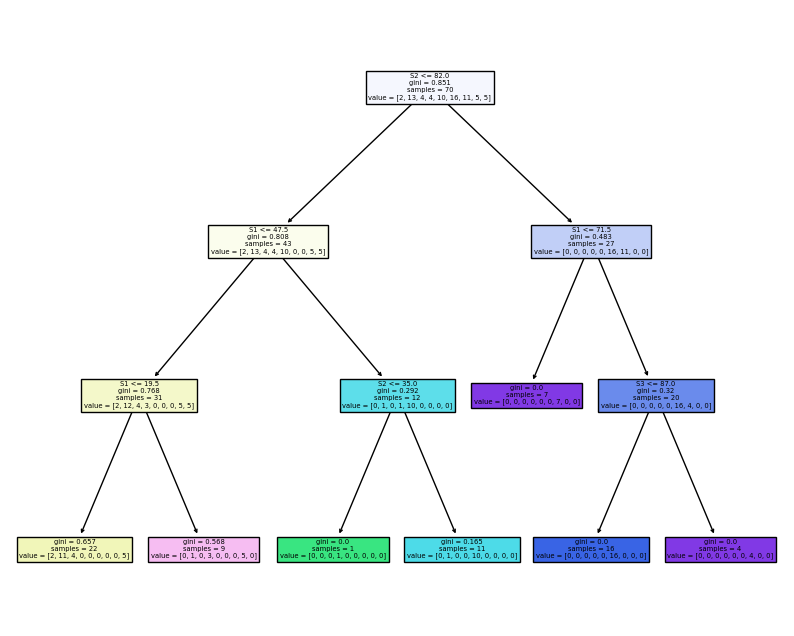

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('/content/drive/MyDrive/work/asbestos.csv', encoding='euc-kr', header=0, index_col=0)
print(data.head()); df = data.dropna()
x = df[['S1' ,'S2', 'S3', 'S4', 'S5']]
y = df['age'].map({'10대':0, '20대':1, '30대':2, '40대':3, '50대':4, '60대':5, '70대':6, '80대':7, '90대':8})
trainx, testx, trainy, testy = train_test_split(x, y, test_size=0.3, random_state=42)
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(trainx, trainy)
predictions = model.predict(testx)
print(predictions[:10])
print('Decision Tree 분류기(결정트리 알고리즘) 정확도: ', end=''); print(accuracy_score(testy, predictions))
print('$$$ Confusion Matrix, 혼동행렬 $$$')
conf = confusion_matrix(testy, predictions); print(conf)
print('*** 분류 분석 모형 성능평가 지표 ***')
print(classification_report(testy, predictions))
print('!!! 특성 중요도 !!!')
print(model.feature_importances_)
plt.figure(figsize=(10,8))
plot_tree(model, filled=True, feature_names=['S1', 'S2' ,'S3', 'S4', 'S5']); plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
from scipy import stats
df = pd.read_csv('/content/drive/MyDrive/work/bugok.csv', encoding='euc-kr')
dfmale = df[df['성별'] == '남성']
dffemale = df[df['성별'] == '여성']
noofmale = len(dfmale)
nooffemale = len(dffemale)
print('남성의 수: ', end=''); print(noofmale)
print('여성의 수: ', end=''); print(nooffemale)
x1 = len(dfmale[dfmale['환자구분']=='정신'])
x2 = len(dffemale[dffemale['환자구분']=='정신'])
print('남성들 중 환자구분="정신"인 사람의 수: ', end=''); print(x1)
print('여자들 중 환자구분="정신"인 사람의 수: ', end=''); print(x2)
print('환자구분="정신"인 남성의 비율: ', end=''); print(x1/noofmale)
print('환자구분="정신"인 여성의 비율: ', end=''); print(x2/nooffemale)
observed = [[[x1, x2], [noofmale-x1, nooffemale-x2]]]
print(observed)
chi, pvalue, dof, expect = stats.chi2_contingency(observed)
print('카이제곱 검정 통계량: ', end=''); print(round(chi, 3))
print('pvalue(유의확률): ', end=''); print(round(pvalue, 4))
print('기대 빈도수: ', end=''); print(expect)

alpha = 0.5
if pvalue < alpha:
  print("(남성, 여성)에 대한 환자구분='정신'의 비율의 차이가 유의미하게 존재합니다. (귀무가설 기각)")
else:
  print("(남성, 여성)에 대한 환자구분='정신'의 비율의 차이가 유의미하지 않습니다. (귀무가설 채택)")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
남성의 수: 19
여성의 수: 14
남성들 중 환자구분="정신"인 사람의 수: 6
여자들 중 환자구분="정신"인 사람의 수: 6
환자구분="정신"인 남성의 비율: 0.3157894736842105
환자구분="정신"인 여성의 비율: 0.42857142857142855
[[[6, 6], [13, 8]]]
카이제곱 검정 통계량: 0.09
pvalue(유의확률): 0.7645
기대 빈도수: [[[ 6.90909091  5.09090909]
  [12.09090909  8.90909091]]]
(남성, 여성)에 대한 환자구분='정신'의 비율의 차이가 유의미하지 않습니다. (귀무가설 채택)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
from statsmodels.formula.api import ols
data = pd.read_csv('/content/drive/MyDrive/work/airquality.csv', encoding='euc-kr', index_col=0)
df = data.dropna()
print(df.head())
x = df[['Ozone', 'Solar.R', 'Wind']]
y = df['Temp']
fit = ols('y ~ x', data=df).fit()
print(fit.summary())

print('T-검정통계량: ', end=''); print(fit.tvalues)
print('p-value: ', end=''); print(fit.pvalues)
print('Ozone 항목에 대한 계수(Coefficient): ', end=''); print(round(fit.params[1], 3))
print('Wind 항목에 대한 p-value: ', end=''); print(round(fit.pvalues[3], 3))

print('@@@ 종속변수 값에 따른 실제값/온도 = 62F @@@')
print(df.iloc[3])
pred = fit.predict(exog=dict(x=[[18, 313, 11.5]]))
print('종속변수에 대한 예측값(F): ', end=''); print(pred[0])

relative_error = (df.iloc[3,3]-pred.values)/df.iloc[3,3]*100
print('실제값과 예측값 사이의 상대오차_절대값(%): ', end='');
print(abs(relative_error))

print('Ozone항목에 대한 95% 신뢰구간(하한): ', end=''); print(round(fit.conf_int(alpha=0.05)[0][1], 4))
print('Ozone항목에 대한 95% 신뢰구간(상한): ', end=''); print(round(fit.conf_int(alpha=0.05)[1][1], 4))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   Ozone  Solar.R  Wind  Temp  Month  Day
1   41.0    190.0   7.4    67      5    1
2   36.0    118.0   8.0    72      5    2
3   12.0    149.0  12.6    74      5    3
4   18.0    313.0  11.5    62      5    4
7   23.0    299.0   8.6    65      5    7
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     35.65
Date:                Tue, 18 Jun 2024   Prob (F-statistic):           4.73e-16
Time:                        10:12:50   Log-Likelihood:                -368.79
No. Observations:                 111   AIC:                             745.6
Df Residuals:                     107   BIC:                      

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
from sklearn.preprocessing import StandardScaler
data = pd.read_csv('/content/drive/MyDrive/work/score.csv', encoding='euc-kr')
print(data.head())
print(data.describe())
print(data.shape)
print(data.info())
print(data.dtypes)
print(data.index)

scaler = StandardScaler()
data['scaler'] = scaler.fit_transform(data[['score']])
print(sum(data['scaler']>=0.8))

def standard(x):
  return ((x-x.mean())/x.std())

data['scalerfn'] = standard(data['score'])
print(sum(data['scalerfn']>=0.8))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   year                                   type  subject  score
0  2000  간호사                                      성인간호학     80
1  2000  간호사                                      모성간호학     40
2  2000  간호사                                      아동간호학     40
3  2000  간호사                                    지역사회간호학     40
4  2000  간호사                                      정신간호학     40
              year        score
count  4248.000000  4248.000000
mean   2011.756356    36.583569
std       6.783039    23.140974
min    2000.000000     2.000000
25%    2006.000000    20.000000
50%    2012.000000    30.000000
75%    2018.000000    45.000000
max    2023.000000   100.000000
(4248, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4248 entries, 0 to 4247
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   year     4

In [5]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
data = pd.read_csv('/content/drive/MyDrive/work/score.csv', encoding='euc-kr')
ddd = data[data['year']==2022]
df = ddd[['type','score']]
df['type'] = df['type'].str.strip()
dfnew = df[df['type'].isin(['간호사','간호조무사','요양보호사','의사'])]
print(dfnew.head())

def calculate(type1, type2, dframe):
  subset1 = dframe[dframe['type']==type1]['score']
  subset2 = dframe[dframe['type']==type2]['score']
  min_length = min(subset1.shape[0], subset2.shape[0])
  subset1 = subset1.values[:min_length]
  subset2 = subset2.values[:min_length]
  correlation = np.corrcoef(subset1, subset2)[0,1]
  return pd.Series({'subset1': type1, 'subset2': type2, 'correlation': correlation})
corrdata = pd.concat([
    calculate('간호사', '간호조무사', dfnew),
    calculate('간호사', '요양보호사', dfnew),
    calculate('간호사', '의사', dfnew),
    calculate('간호조무사', '요양보호사', dfnew),
    calculate('간호조무사', '의사', dfnew),
    calculate('요양보호사', '의사', dfnew)
], axis=1).T.reset_index(drop=True)
print(corrdata)
corrdata = corrdata.dropna()
print(corrdata)
maxcorr = corrdata.loc[corrdata['correlation'].abs().sort_values(ascending=False).index[0]]
print('*** 상관계수 절대값의 최대값 ***')
print(maxcorr)
print(round(maxcorr['correlation'],5))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
     type  score
3963  간호사     70
3964  간호사     35
3965  간호사     35
3966  간호사     35
3967  간호사     35
  subset1 subset2 correlation
0     간호사   간호조무사    0.293927
1     간호사   요양보호사         NaN
2     간호사      의사   -0.659955
3   간호조무사   요양보호사         NaN
4   간호조무사      의사   -0.578818
5   요양보호사      의사         NaN
  subset1 subset2 correlation
0     간호사   간호조무사    0.293927
2     간호사      의사   -0.659955
4   간호조무사      의사   -0.578818
*** 상관계수 절대값의 최대값 ***
subset1             간호사
subset2              의사
correlation   -0.659955
Name: 2, dtype: object
-0.65995


<ipython-input-5-18a3c59ecf9e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['type'] = df['type'].str.strip()
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
203
하위 25% score= 31.0
하위 75% score=67.0
Inter-quantile range/사분위 수 범위 =36.0
17


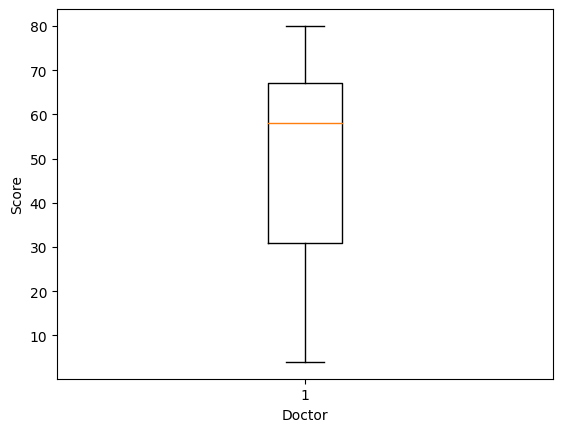

In [14]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('/content/drive/MyDrive/work/score.csv', encoding='euc-kr')

data['type'] = data['type'].str.strip()
dfnew = data[data['type'] == '의사']
print(len(dfnew))

q25 = np.percentile(dfnew['score'], 25)
print('하위 25% score= ', end=''); print(q25)

q75 = np.percentile(dfnew['score'], 75)
print('하위 75% score=', end=''); print(q75)
iqr = q75 - q25
print('Inter-quantile range/사분위 수 범위 =', end=''); print(iqr)
result = dfnew['score'] >= q75 + 0.1*iqr
print(np.sum(result))

plt.boxplot(dfnew['score'])
plt.xlabel('Doctor')
plt.ylabel('Score')
plt.show()

- x(독립변수): (education.num, capitalgain, hourweek) = (교육수준(숫자), 자본이익, 노동시간)
- y(종속변수): amount(연봉)
- id = np.random.choice(dfnew.index, size=int(0.7*len(dfnew)), replace=False): 데이터 랜덤 추출
- train = dfnew.iloc[id]: 훈련 데이터
- test = dfnew.drop(id): 평가 데이터
- lmmodel = LinearRegression(): 다중 선형회귀 분석 모형
- features = ['education.num', 'capitalgain', 'hourweek']: 독립변수(특성) 정의
- lmmodel.fit(train[features], train['amount']): 모형 훈련(학습)
- new = pd.DataFrame({'actual':test['amount']}): 평가 데이터에 대한 실제값(연봉)
- new['predict'] = lmmodel.predict(test[features]): 평가 데이터를 이용한 예측값(연봉)
- rmse = np.sqrt(mean_squared_error(new['actual'],new['predict'])): RMSE 계산

In [16]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

data = pd.read_csv('/content/drive/MyDrive/work/amount.csv', encoding='euc-kr')
print(data.head())

data.replace("?", np.nan, inplace=True)
dfnew = data.dropna()

np.random.seed(123)
id = np.random.choice(dfnew.index, size=int(0.7*len(dfnew)), replace=False)
train = dfnew.loc[id]
test = dfnew.drop(id)

lmmodel = LinearRegression()
features = ['education.num', 'capitalgain', 'hourweek']
lmmodel.fit(train[features], train['amount'])

new = pd.DataFrame({'actual': test['amount']})
new['predict'] = lmmodel.predict(test[features])

rmse = np.sqrt(mean_squared_error(new['actual'], new['predict']))
print('RMSE/Root Mean Squared Error: ', end=''); print(rmse)
print(round(rmse, 3))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   age         workclass  education  education.num             marital  \
0   27           Private  Preschool              1  Married-civ-spouse   
1   63  Self-emp-not-inc    Masters             14  Married-civ-spouse   
2   17                 ?       10th              6       Never-married   
3   18           Private    HS-grad              9       Never-married   
4   19           Private    HS-grad              9       Never-married   

        occupation    relationship   race     sex  capitalgain  hourweek  \
0  Farming-fishing  Other-relative  White    Male        41310        24   
1  Farming-fishing         Husband  White    Male        41310        50   
2                ?       Own-child  White  Female        34095        32   
3  Protective-serv       Own-child  White    Male        34095         3   
4    Other-service       Own-child  White  Fem

- x(독립변수): (education.num, capitalgain, hourweek) = (교육수준(숫자), 자본이익, 노동시간)
- y(종속변수): amount(연봉)
- rfmodel = RandomForestRegressor(): 랜덤 포레스트 모형
- kf = KFold(n_splits=5, shuffle=True, random_state=123):5-fold 교차검증
- grid_search = GridSearchCV(estimator = rfmodel, param_grid = param, scorring='neg_mean_squared_error', cv=kf): 최적 하이퍼 파라미터 탐색

In [17]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold
data = pd.read_csv('/content/drive/MyDrive/work/amount.csv', encoding='euc-kr')
print(data.head())
data.replace("?", np.nan, inplace=True)
dfnew = data.dropna()
np.random.seed(123)
id = np.random.choice(dfnew.index, size=int(0.7*len(dfnew)), replace=False)
train = dfnew.loc[id]
test = dfnew.drop(id)
rfmodel = RandomForestRegressor()
param = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
features = ['education.num', 'capitalgain', 'hourweek']
kf = KFold(n_splits=5, shuffle=True, random_state=123)
grid_search = GridSearchCV(estimator=rfmodel, param_grid=param, scoring='neg_mean_squared_error', cv=kf)
grid_search.fit(train[features], train['amount'])
best = grid_search.best_estimator_
print(best)
new = pd.DataFrame({'actual': test['amount']})
new['predict'] = best.predict(test[features])
print(new.head())
rmse = np.sqrt(mean_squared_error(new['actual'], new['predict']))
print('RMSE/Root Mean Squared Error: ', end=''); print(rmse)
print(round(rmse, 3))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   age         workclass  education  education.num             marital  \
0   27           Private  Preschool              1  Married-civ-spouse   
1   63  Self-emp-not-inc    Masters             14  Married-civ-spouse   
2   17                 ?       10th              6       Never-married   
3   18           Private    HS-grad              9       Never-married   
4   19           Private    HS-grad              9       Never-married   

        occupation    relationship   race     sex  capitalgain  hourweek  \
0  Farming-fishing  Other-relative  White    Male        41310        24   
1  Farming-fishing         Husband  White    Male        41310        50   
2                ?       Own-child  White  Female        34095        32   
3  Protective-serv       Own-child  White    Male        34095         3   
4    Other-service       Own-child  White  Fem

- x(독립변수): (education.num, capitalgain, hourweek) = (교육수준(숫자), 자본이익, 노동시간)
- y(종속변수): amount(연봉)
- dtmodel = DecisionTreeRegressor(): 의사결정나무 분석 모형
- kf = KFold(n_splits=5, shuffle = True, random_state=123):5-fold 교차검증
- grid_search = GridSearchCV(estimator=dtmodel, param_grid=param, scoring='neg_mean_squared_error', cv=kf): 최적 하이퍼 파라미터 탐색
- plot_tree(best, feature_names = features, filled=True, rounded=True, class_names=['amount']): 의사결정나무 분석 결과 시각화

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   age         workclass  education  education.num             marital  \
0   27           Private  Preschool              1  Married-civ-spouse   
1   63  Self-emp-not-inc    Masters             14  Married-civ-spouse   
2   17                 ?       10th              6       Never-married   
3   18           Private    HS-grad              9       Never-married   
4   19           Private    HS-grad              9       Never-married   

        occupation    relationship   race     sex  capitalgain  hourweek  \
0  Farming-fishing  Other-relative  White    Male        41310        24   
1  Farming-fishing         Husband  White    Male        41310        50   
2                ?       Own-child  White  Female        34095        32   
3  Protective-serv       Own-child  White    Male        34095         3   
4    Other-service       Own-child  White  Fem

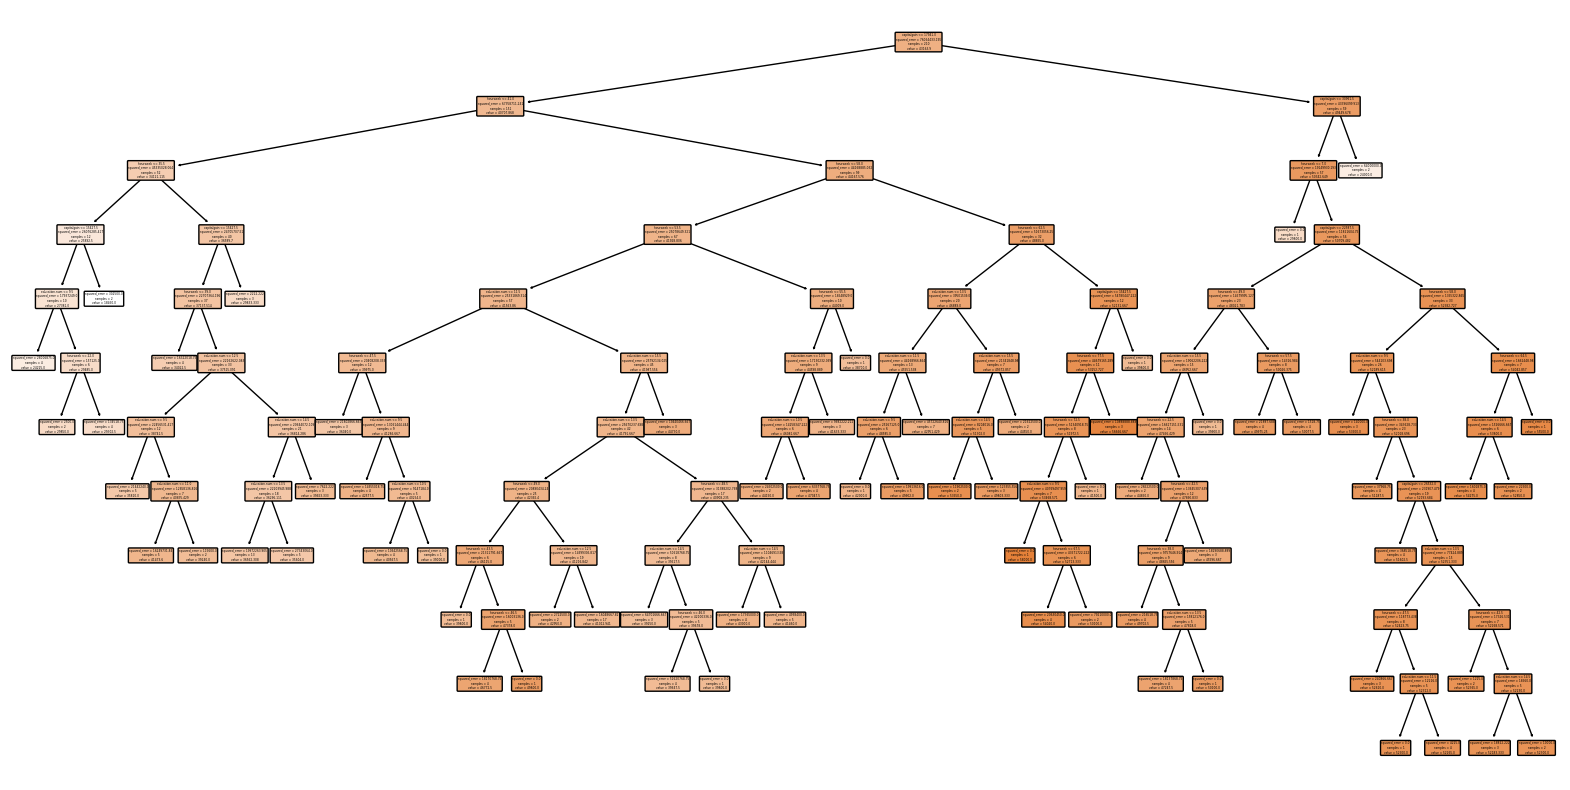

In [18]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
data = pd.read_csv('/content/drive/MyDrive/work/amount.csv', encoding='euc-kr')
print(data.head())
data.replace("?", np.nan, inplace=True)
dfnew = data.dropna()
np.random.seed(123)
id = np.random.choice(dfnew.index, size=int(0.7*len(dfnew)), replace=False)
train = dfnew.loc[id]
test = dfnew.drop(id)
dtmodel = DecisionTreeRegressor()
param = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
features = ['education.num', 'capitalgain', 'hourweek']
kf = KFold(n_splits=5, shuffle=True, random_state=123)
grid_search = GridSearchCV(estimator=dtmodel, param_grid=param, scoring='neg_mean_squared_error', cv=kf)
grid_search.fit(train[features], train['amount'])
best = grid_search.best_estimator_
print(best)
new = pd.DataFrame({'actual': test['amount']})
new['predict'] = best.predict(test[features])
print(new.head())
rmse = np.sqrt(mean_squared_error(new['actual'], new['predict']))
print('RMSE/Root Mean Squared Error: ', end=''); print(rmse)
print(round(rmse, 3))
plt.figure(figsize=(20, 10))
plot_tree(best, feature_names=features, filled=True, rounded=True, class_names=['amount'])
plt.show()

In [19]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np

data = pd.read_csv('/content/drive/MyDrive/work/eduhealth.csv', encoding='euc-kr')
print(data.head())

dfnew = data.dropna()
dfnew['성별'] = pd.factorize(dfnew['성별'], sort=True)[0].astype(int)
print(dfnew.head())
print(sum(dfnew['성별'] == 0))
print(sum(dfnew['성별'] == 1))
print(dfnew.shape)

corrmatrix = dfnew[['학년', '키', '몸무게', '성별']].corr()
print(corrmatrix)
maxcorr = np.max(np.abs(corrmatrix.values[np.tril_indices(len(corrmatrix), k=-1)]))
print(maxcorr)
print('상관계수 절대값의 최대값: ', end=''); print(round(maxcorr, 3))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   학교ID  학년       건강검진일      키   몸무게 성별
0  Aa01   1  2015-05-12  125.8  27.3  남
1  Aa01   1  2015-04-22  124.3  25.4  남
2  Aa01   1  2015-04-21  119.2  23.5  남
3  Aa01   1  2015-04-21  115.0  20.0  남
4  Aa01   1  2015-04-23  120.0  33.5  남
   학교ID  학년       건강검진일      키   몸무게  성별
0  Aa01   1  2015-05-12  125.8  27.3   0
1  Aa01   1  2015-04-22  124.3  25.4   0
2  Aa01   1  2015-04-21  119.2  23.5   0
3  Aa01   1  2015-04-21  115.0  20.0   0
4  Aa01   1  2015-04-23  120.0  33.5   0
4964
4718
(9682, 6)
           학년         키       몸무게        성별
학년   1.000000 -0.114997 -0.128170 -0.003338
키   -0.114997  1.000000  0.849006 -0.180885
몸무게 -0.128170  0.849006  1.000000 -0.183193
성별  -0.003338 -0.180885 -0.183193  1.000000
0.8490058387688966
상관계수 절대값의 최대값: 0.849


<ipython-input-19-03e2354fb915>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfnew['성별'] = pd.factorize(dfnew['성별'], sort=True)[0].astype(int)


In [20]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import statsmodels.api as sm
data = pd.read_csv('/content/drive/MyDrive/work/eduhealth.csv', encoding='euc-kr')

dfnew = data.dropna()
model = sm.OLS(dfnew['몸무게'], sm.add_constant(dfnew['키'])).fit()
print(model.summary())
rsq = model.rsquared
print(f"R-squared: {rsq: .3f}")

coefficient = model.params['키']
print(coefficient)
odds = round(np.exp(coefficient), 3)
print(f"odds: {odds}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
                            OLS Regression Results                            
Dep. Variable:                    몸무게   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                 2.499e+04
Date:                Tue, 18 Jun 2024   Prob (F-statistic):               0.00
Time:                        14:54:42   Log-Likelihood:                -35036.
No. Observations:                9682   AIC:                         7.008e+04
Df Residuals:                    9680   BIC:                         7.009e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--

In [23]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import statsmodels.api as sm
data = pd.read_csv('/content/drive/MyDrive/work/eduhealth.csv', encoding='euc-kr')

dfnew = data.dropna()
dfnew['성별'] = pd.factorize(dfnew['성별'], sort=True)[0].astype(int)

model = sm.Logit(dfnew['성별'], sm.add_constant(dfnew[['키', '몸무게']]))
result = model.fit()
print(result.summary())
pvalues = result.pvalues
print(pvalues)
maxpvalues = max(pvalues)
print(maxpvalues)
print(round(maxpvalues, 3))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Optimization terminated successfully.
         Current function value: 0.674640
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                     성별   No. Observations:                 9682
Model:                          Logit   Df Residuals:                     9679
Method:                           MLE   Df Model:                            2
Date:                Tue, 18 Jun 2024   Pseudo R-squ.:                 0.02625
Time:                        14:58:41   Log-Likelihood:                -6531.9
converged:                       True   LL-Null:                       -6707.9
Covariance Type:            nonrobust   LLR p-value:                 3.451e-77
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------

<ipython-input-23-577dcb866ca3>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfnew['성별'] = pd.factorize(dfnew['성별'], sort=True)[0].astype(int)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Optimization terminated successfully.
         Current function value: 0.675654
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                     성별   No. Observations:                 6777
Model:                          Logit   Df Residuals:                     6774
Method:                           MLE   Df Model:                            2
Date:                Tue, 18 Jun 2024   Pseudo R-squ.:                 0.02484
Time:                        15:07:21   Log-Likelihood:                -4578.9
converged:                       True   LL-Null:                       -4695.5
Covariance Type:            nonrobust   LLR p-value:                 2.208e-51
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------

<ipython-input-24-933f6f99b5ae>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfnew['성별'] = dfnew['성별'].map({'남':0, '여':1})


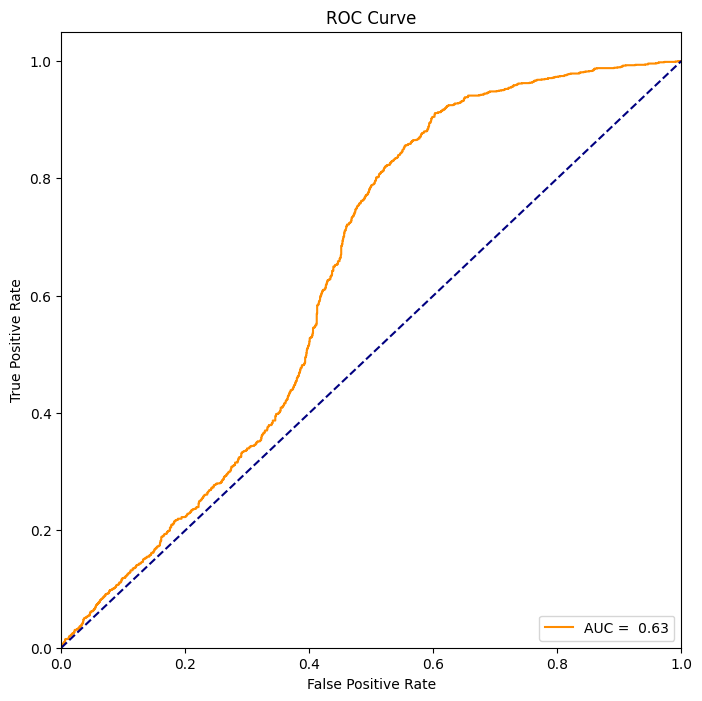

In [24]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import statsmodels.api as sm
data = pd.read_csv('/content/drive/MyDrive/work/eduhealth.csv', encoding='euc-kr')
dfnew = data.dropna()
dfnew['성별'] = dfnew['성별'].map({'남':0, '여':1})
X = dfnew[['키', '몸무게']]
y = dfnew['성별']
np.random.seed(123)
X= sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
model = sm.Logit(y_train, X_train)
result = model.fit()
print(result.summary())
y_pred_proba = result.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print(f'평가 데이터에 대한 정확도: {accuracy: .4f}')
confmatrix = confusion_matrix(y_test, y_pred)
print(confmatrix)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
print(f'ROC AUC: {roc_auc: .4f}')
plt.figure(figsize=(8,8))
plt.plot(fpr, tpr, color='darkorange', label=f'AUC = {roc_auc: .2f}')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()